In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [284]:
data = '/Users/lorenzotara/Documents/EPFL/Applied Data Analysis/Homeworks/ADA2017-Homeworks/04 - Applied ML/lalonde.csv'

In [285]:
lalonde = pd.read_csv(data)
lalonde.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## Part 1

Task: A naive analysis

Compare the distribution of the outcome variable (re78) between the two groups, using plots and numbers. To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

* Here we show the distribution of re78 on the entire dataset.

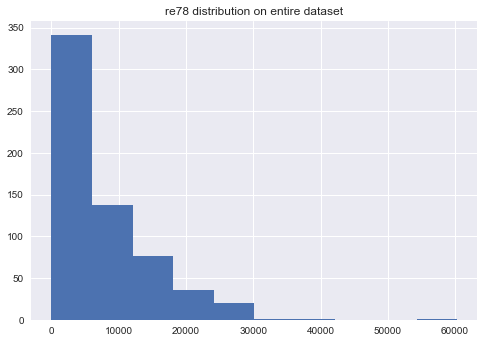

In [286]:
fig, ax = plt.subplots()
ax.hist(lalonde.re78)
ax.set_title("re78 distribution on entire dataset")
plt.show()

* Here instead, we show the distributions of re78 first on treated subjects dataset and then on the not treated subjects dataset.

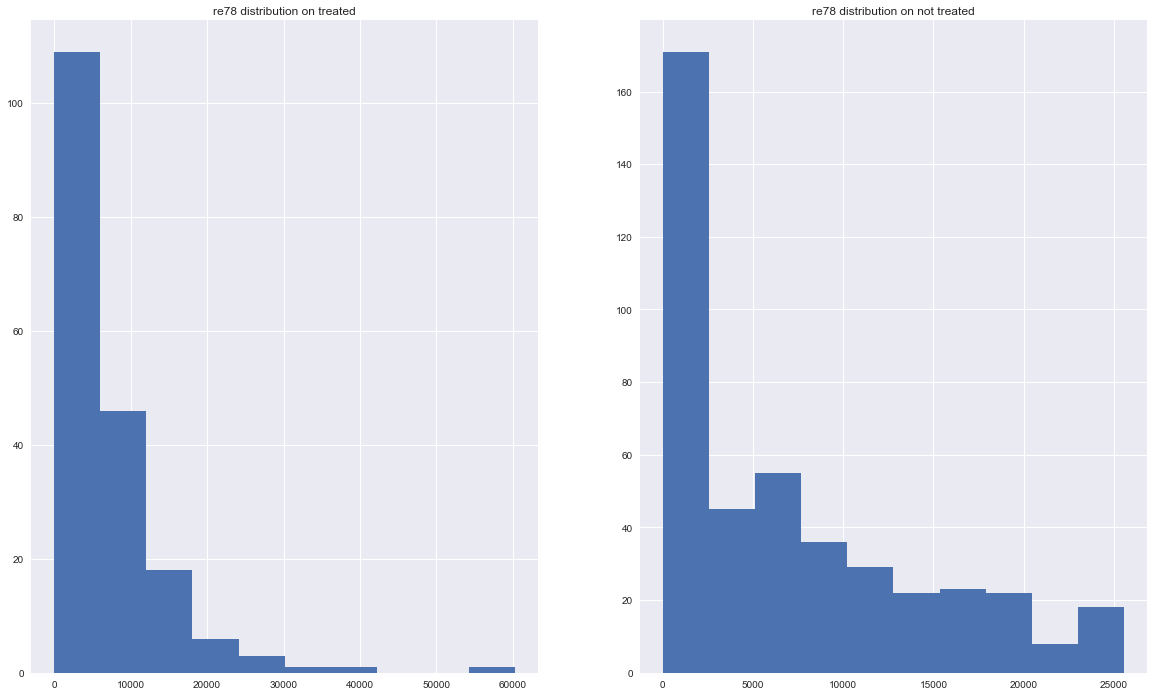

In [287]:
lalonde_treat = lalonde[lalonde.treat == 1]
lalonde_notreat = lalonde[lalonde.treat == 0]

fig, axs = plt.subplots(1, 2, figsize=(20,12))

axs[0].hist(lalonde_treat.re78)
axs[0].set_title("re78 distribution on treated")
axs[1].hist(lalonde_notreat.re78)
axs[1].set_title("re78 distribution on not treated")
plt.show()

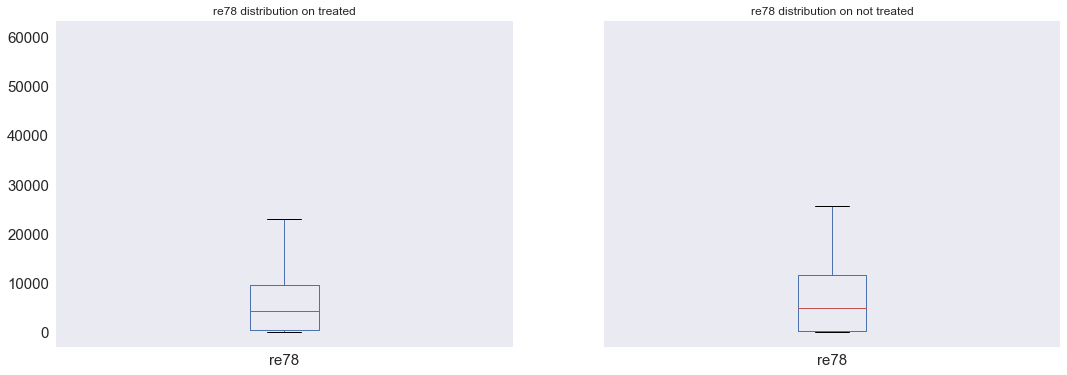

In [288]:
fig, axs = plt.subplots(1, 2, figsize=(18,6), sharey=True)

lalonde_treat[['re78']].boxplot(ax=axs[0], fontsize=15, grid=False)
axs[0].set_title("re78 distribution on treated")
lalonde_notreat[['re78']].boxplot(ax=axs[1], fontsize=15, grid=False)
axs[1].set_title("re78 distribution on not treated")
plt.show()

In [289]:
lalonde_treat.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [290]:
lalonde_notreat.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

#### Observations
* With this naive analysis we can conclude that the treatment didn't work. If we look at the distributions and the descriptions of the two groups, we can see that they are very similar. More specifically, the median and the mean, even if it's not a robust statistics, values of the non treated group is higher. About the mean, in the first group (the treated one) there are several outliers and a very high maximum, and the mean is lower. This is another proof that can lead us to the (wrong) conclusion that the treatment wasn't successful. Of course we will change our mind going deeper in this study case.

## Part 2

Task: A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above. You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers. As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe? Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

* First we will compare the features showing the differences between the two groups and then we will compare the distributions of every feature in both groups.

### Comparing features

#### Age

* In order to see the differences of the ages in the two groups, we decided to divide the feature in 7 different groups, as you can see below. We counted how many patients of the same age are in a specific range (with value_counts) and then we summed the results all together. Example: in the first subset we could have had something like: 17 = 4, 18 = 2, 19 = 1, 20 = 12, 21 = 3, 22 = 7, 23 = 1, 24 = 8, 25 = 16; if we sum everything together we will obtain how many patients are in that range.
* Finally we plot our results.

In [291]:
age_17_25_treat = lalonde_treat[lalonde_treat.age < 26].age.value_counts().sum()
age_17_25_notreat = lalonde_notreat[lalonde_notreat.age < 26].age.value_counts().sum()

age_26_30_treat = lalonde_treat[(lalonde_treat.age >= 26) & (lalonde_treat.age < 31)].age.value_counts().sum()
age_26_30_notreat = lalonde_notreat[(lalonde_notreat.age >= 26) & (lalonde_notreat.age < 31)].age.value_counts().sum()

age_31_35_treat = lalonde_treat[(lalonde_treat.age >= 31) & (lalonde_treat.age < 36)].age.value_counts().sum()
age_31_35_notreat = lalonde_notreat[(lalonde_notreat.age >= 31) & (lalonde_notreat.age < 36)].age.value_counts().sum()

age_36_40_treat = lalonde_treat[(lalonde_treat.age >= 36) & (lalonde_treat.age < 41)].age.value_counts().sum()
age_36_40_notreat = lalonde_notreat[(lalonde_notreat.age >= 36) & (lalonde_notreat.age < 41)].age.value_counts().sum()

age_41_45_treat = lalonde_treat[(lalonde_treat.age >= 36) & (lalonde_treat.age < 41)].age.value_counts().sum()
age_41_45_notreat = lalonde_notreat[(lalonde_notreat.age >= 36) & (lalonde_notreat.age < 41)].age.value_counts().sum()

age_46_50_treat = lalonde_treat[(lalonde_treat.age >= 46) & (lalonde_treat.age < 51)].age.value_counts().sum()
age_46_50_notreat = lalonde_notreat[(lalonde_notreat.age >= 46) & (lalonde_notreat.age < 51)].age.value_counts().sum()

age_51_more_treat = lalonde_treat[lalonde_treat.age >= 51].age.value_counts().sum()
age_51_more_notreat = lalonde_notreat[lalonde_notreat.age >= 51].age.value_counts().sum()

age_treated = [age_17_25_treat, age_26_30_treat, age_31_35_treat, age_36_40_treat, age_41_45_treat, age_46_50_treat, age_51_more_treat]
age_notreated = [age_17_25_notreat, age_26_30_notreat, age_31_35_notreat, age_36_40_notreat, age_41_45_notreat, age_46_50_notreat, age_51_more_notreat]

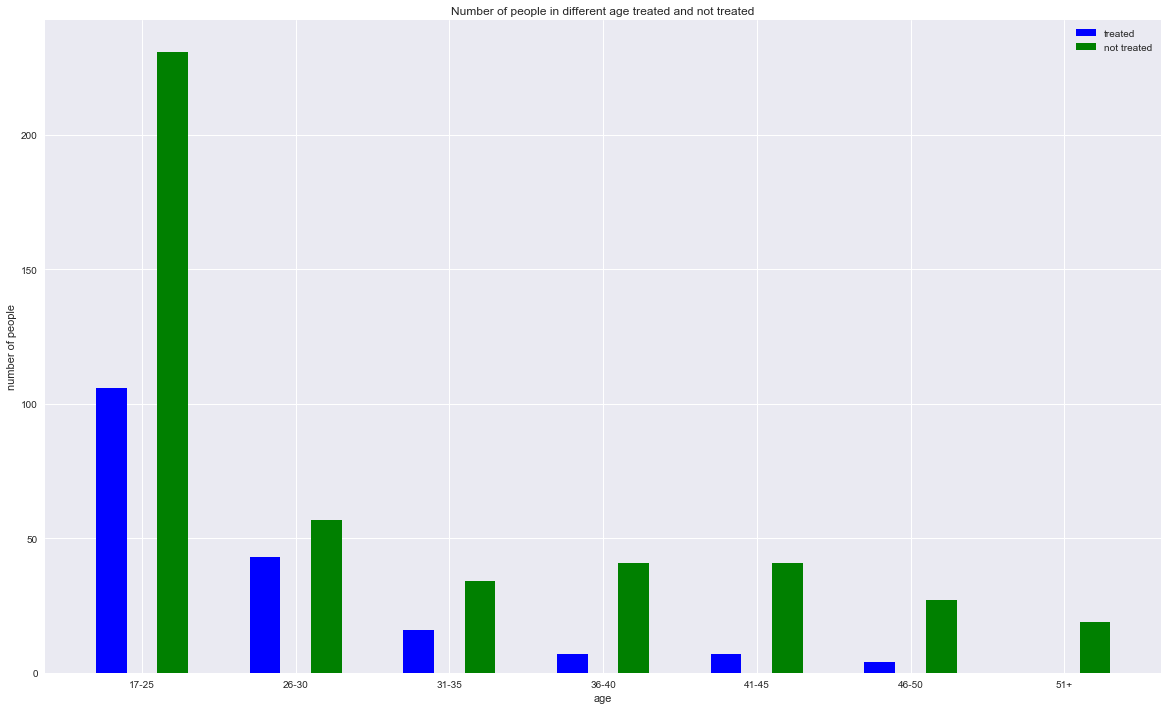

In [292]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

x_age = np.array([1,2,3,4,5,6,7])
labels_age = ['17-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51+']

ax.bar(x_age - 0.2, age_treated, width=0.2, color ='b')
ax.bar(x_age + 0.2, age_notreated, width=0.2, color='g')
ax.set_xticks(x_age)
ax.set_xticklabels(labels_age)
ax.set_xlabel('age')
ax.set_ylabel('number of people')
ax.set_title("Number of people in different age treated and not treated")
ax.legend(['treated', 'not treated'])
plt.show()

* Due to the fact that the number of treated people is lower than the number of not treated ones is not so easy to read this bar chart. Anyway we can conclude that in average people are young and there is a bigger chance to be chosen to be treated if you are young than old. But we can also observe that the trends of the two groups a different: while in the treated group the trend is strictly descendent, in the non treated one, after the peak of young people (17-25), the amount of people in the same age range that have not been treated is almost the same.

#### Categories

* For both groups we count the number of patients for different characteristics: black, hispanic, married, with no degree.
* Then we plot the results.

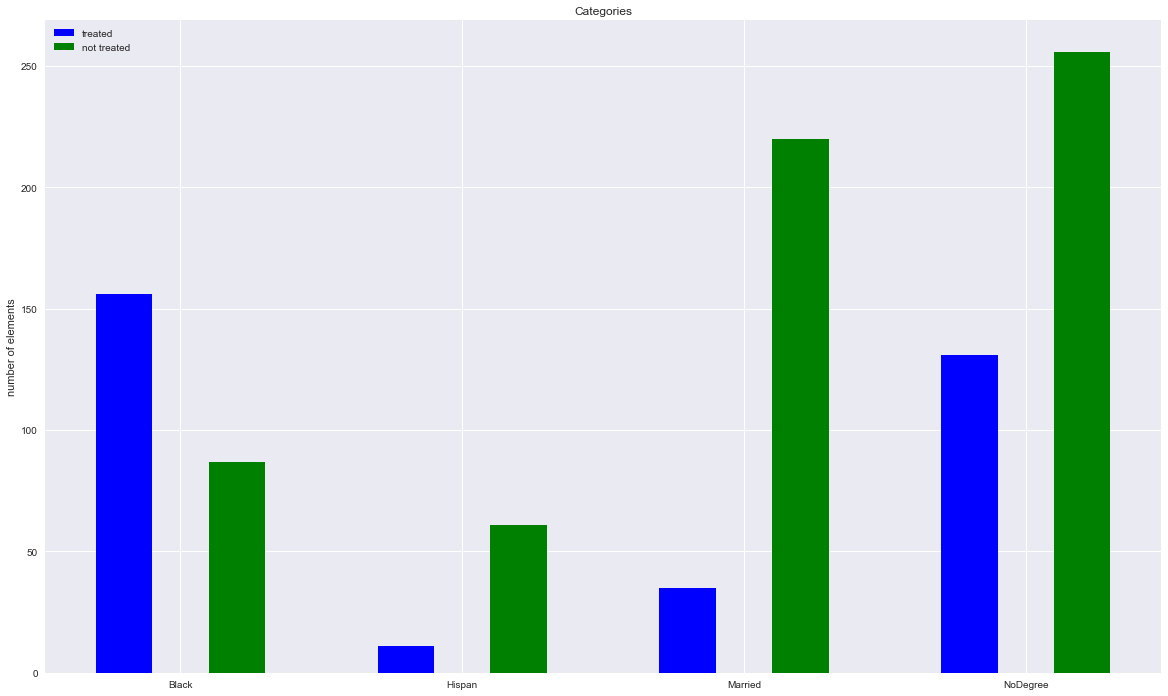

In [293]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

x_category = np.array([1,2,3,4])
labels_category = ["Black", "Hispan", "Married", "NoDegree"]
y_treat = [lalonde_treat.black.sum(), lalonde_treat.hispan.sum(), lalonde_treat.married.sum(), lalonde_treat.nodegree.sum()]
y_notreat = [lalonde_notreat.black.sum(), lalonde_notreat.hispan.sum(), lalonde_notreat.married.sum(), lalonde_notreat.nodegree.sum()]
ax.bar(x_category-0.2, y_treat, width=0.2, color='b')
ax.bar(x_category+0.2, y_notreat, width=0.2, color='g')
ax.set_xticks(x_category, minor=False)
ax.set_xticklabels(labels_category)
ax.set_ylabel('number of elements')
ax.set_title("Categories")
ax.legend(['treated', 'not treated'])

plt.show()

* We have already stated that there are more people in the non treated group than in the treated one, but there are more black people in the treated group than in the non treated one. For the other categories, the two groups follow a similar trend.

#### Education
* Here we want to show the difference in the two groups of years of education

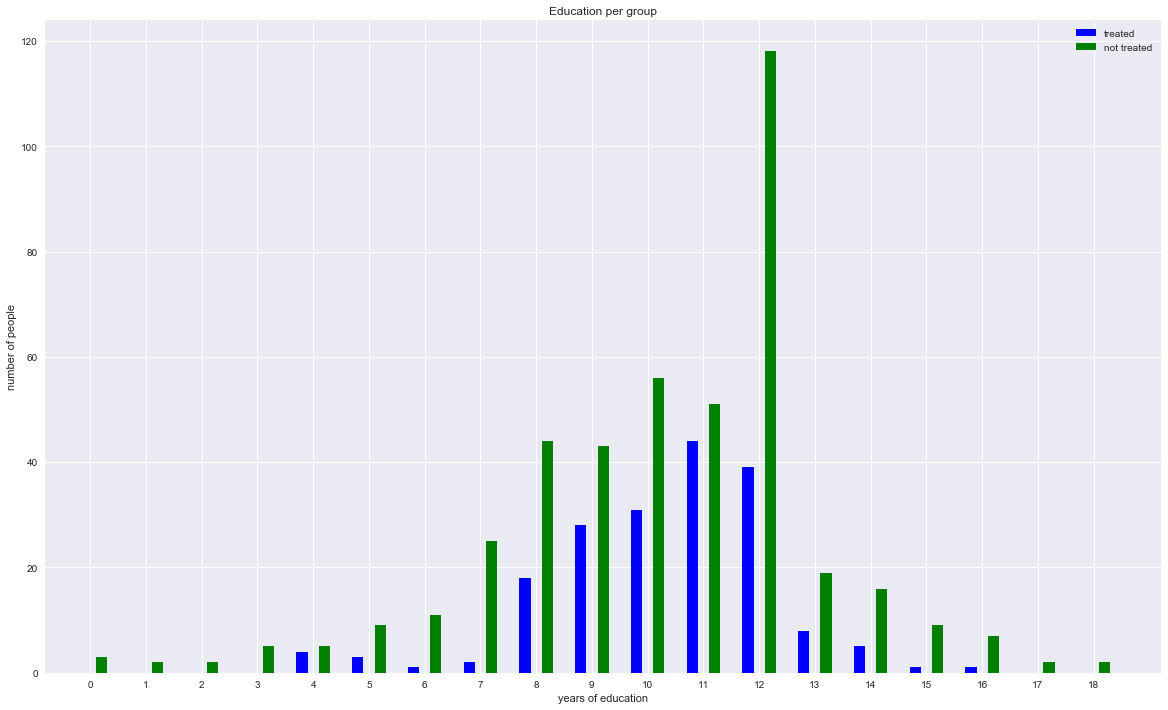

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(20,12))

education_treat = lalonde_treat.educ.value_counts().sort_index()
education_notreat = lalonde_notreat.educ.value_counts().sort_index()
ax.bar(education_treat.index.values - 0.2, education_treat.values, width=0.2, color ='b')
ax.bar(education_notreat.index.values + 0.2, education_notreat.values, width=0.2, color='g')
ax.set_xticks(education_notreat.index.values)
ax.set_xlabel('years of education')
ax.set_ylabel('number of people')
ax.set_title("Education per group")
ax.legend(['treated', 'not treated'])
plt.show()

* From the graph we can see that people were chosen for the treatment only between [4, 16] years of study, with a peak in 11. In the non treated group there is a peak at 12 years of studies: this leads us to think that, in general, people with at least a high school diploma (6-18 years old from elementary school to the end of high school), were less probable to be chosen in the treatment than others.

* Probably visualizing the comparison of the features in this way showed us only one part of the reality that lies behind the data, so from now on we will focus on the distributions per group.

### Distributions

#### Age

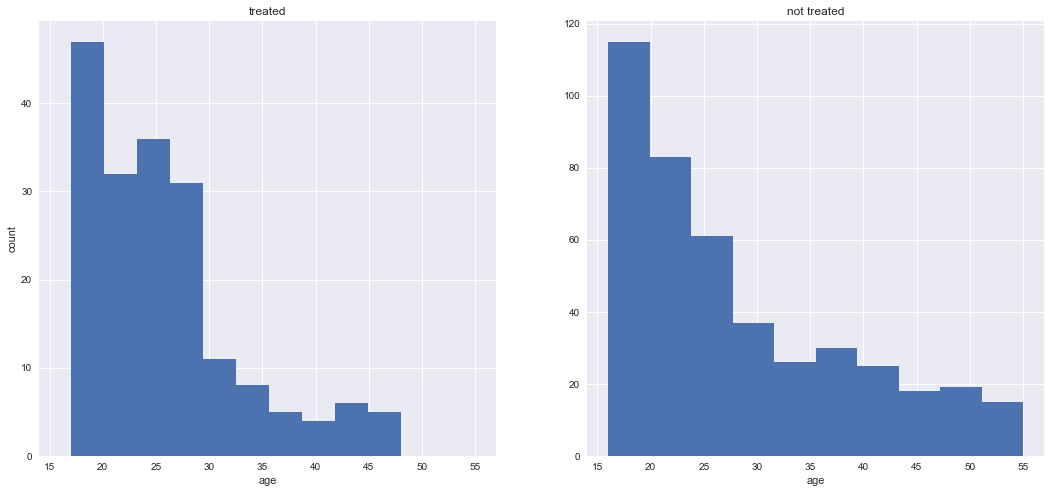

In [295]:
fig, axs = plt.subplots(1, 2, figsize=(18,8), sharex=True)

lalonde_treat.age.hist(ax=axs[0])
lalonde_notreat.age.hist(ax=axs[1])
axs[0].set_xlabel("age")
axs[0].set_title("treated")
axs[1].set_xlabel("age")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [296]:
lalonde_treat.age.describe()

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

In [297]:
lalonde_notreat.age.describe()

count    429.000000
mean      28.030303
std       10.786653
min       16.000000
25%       19.000000
50%       25.000000
75%       35.000000
max       55.000000
Name: age, dtype: float64

* As already stated, we can observe (here even better), that people in the treatment are in average younger than people that are not in the treatment, looking at both median and mean. We can also see that people older than 48 were not chosen to be part of the treatment (probably because due to their age it was hard to expect some serious improvement in their careers).

#### Education

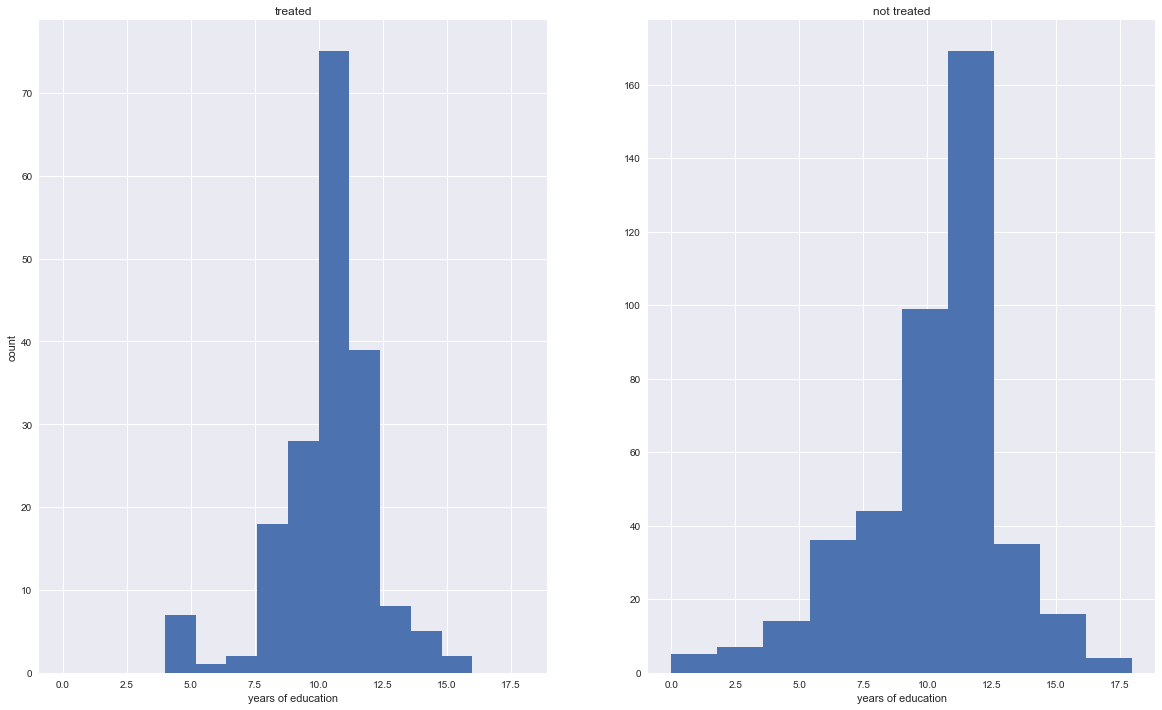

In [298]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True)

lalonde_treat.educ.hist(ax=axs[0])
lalonde_notreat.educ.hist(ax=axs[1])
axs[0].set_xlabel("years of education")
axs[0].set_title("treated")
axs[1].set_xlabel("years of education")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [299]:
lalonde_treat.educ.describe()

count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

In [300]:
lalonde_notreat.educ.describe()

count    429.000000
mean      10.235431
std        2.855238
min        0.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64

* The two distributions are very similar, so probably education was not an important factor in the decision for a worker to be part of the treatment or not.

#### Categories

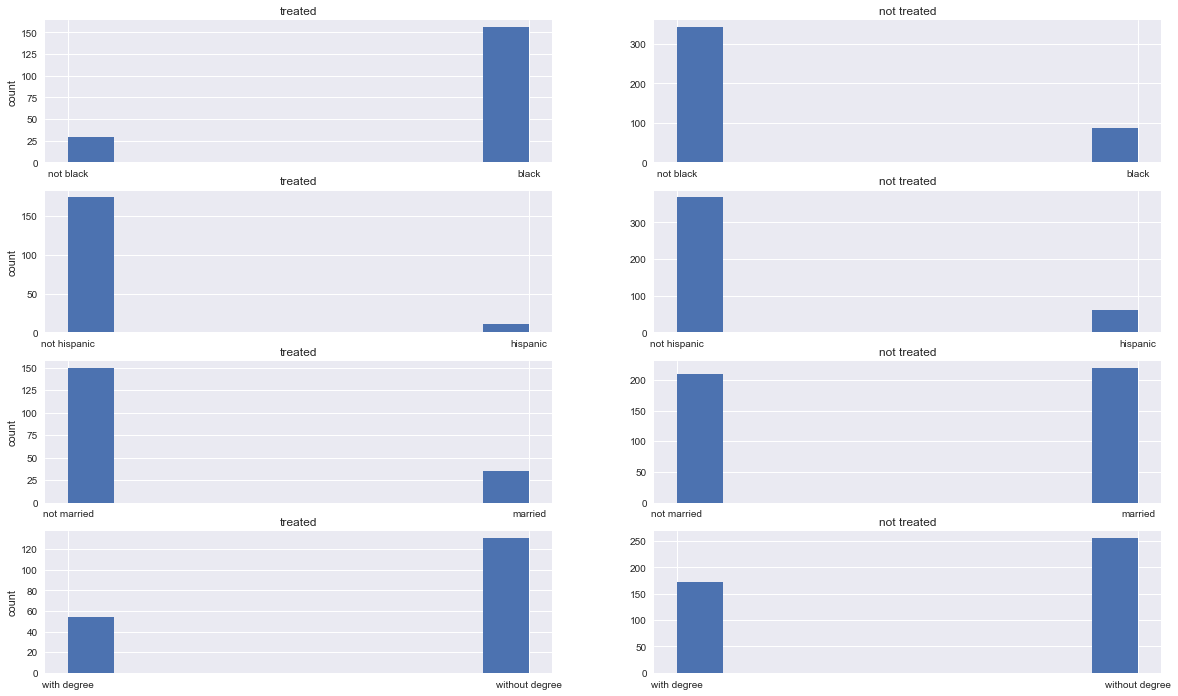

In [301]:
fig, axs = plt.subplots(4, 2, figsize=(20,12))

lalonde_treat.black.hist(ax=axs[0,0])
lalonde_notreat.black.hist(ax=axs[0,1])
axs[0,0].set_xticks(np.array([0,1]))
axs[0,0].set_xticklabels(['not black', 'black'])
axs[0,0].set_title("treated")
axs[0,1].set_xticks(np.array([0,1]))
axs[0,1].set_xticklabels(['not black', 'black'])
axs[0,1].set_title("not treated")
axs[0,0].set_ylabel("count")

lalonde_treat.hispan.hist(ax=axs[1,0])
lalonde_notreat.hispan.hist(ax=axs[1,1])
axs[1,0].set_xticks(np.array([0,1]))
axs[1,0].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,0].set_title("treated")
axs[1,1].set_xticks(np.array([0,1]))
axs[1,1].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,1].set_title("not treated")
axs[1,0].set_ylabel("count")

lalonde_treat.married.hist(ax=axs[2,0])
lalonde_notreat.married.hist(ax=axs[2,1])
axs[2,0].set_xticks(np.array([0,1]))
axs[2,0].set_xticklabels(['not married', 'married'])
axs[2,0].set_title("treated")
axs[2,1].set_xticks(np.array([0,1]))
axs[2,1].set_xticklabels(['not married', 'married'])
axs[2,1].set_title("not treated")
axs[2,0].set_ylabel("count")

lalonde_treat.nodegree.hist(ax=axs[3,0])
lalonde_notreat.nodegree.hist(ax=axs[3,1])
axs[3,0].set_xticks(np.array([0,1]))
axs[3,0].set_xticklabels(['with degree', 'without degree'])
axs[3,0].set_title("treated")
axs[3,1].set_xticks(np.array([0,1]))
axs[3,1].set_xticklabels(['with degree', 'without degree'])
axs[3,1].set_title("not treated")
axs[3,0].set_ylabel("count")

plt.show()

* From these graphs two things are clear: if a person is african-american or if it is without a degree has more chances to be chosen for the treatment. Now the question is: these data are a consequence or a reason for being chosen to be part of the treatment? We will answer to this question later in the study.

#### re74, re75

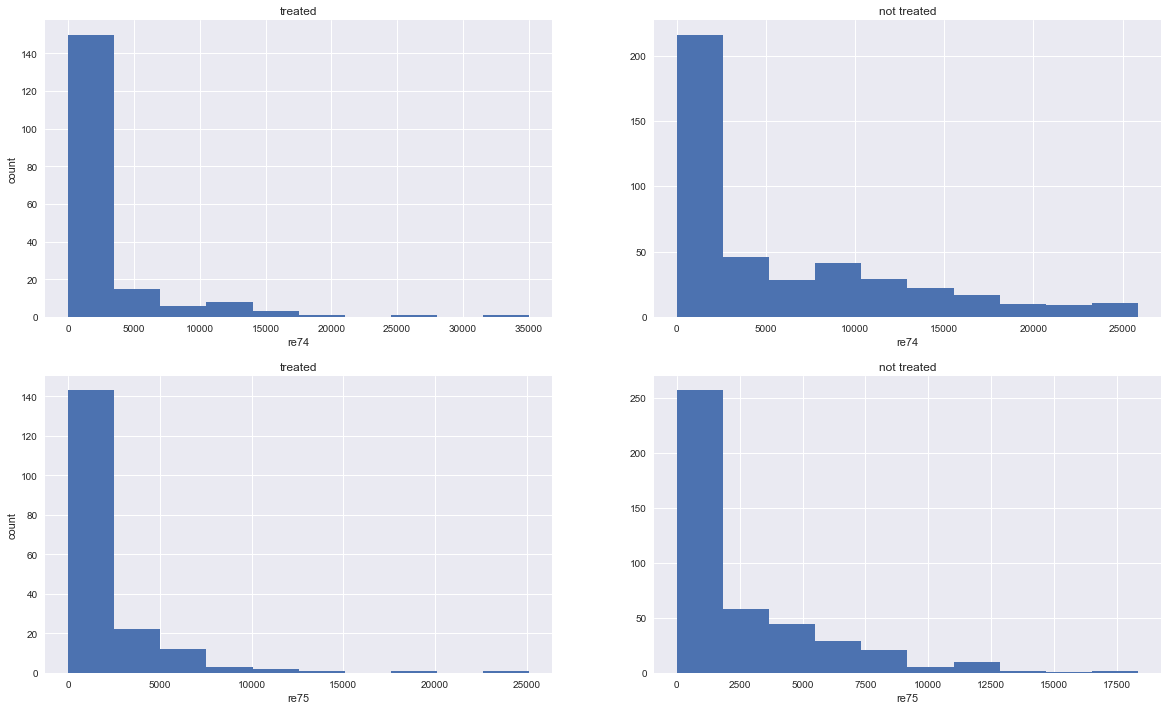

In [302]:
fig, axs = plt.subplots(2, 2, figsize=(20,12))

lalonde_treat.re74.hist(ax=axs[0,0])
lalonde_notreat.re74.hist(ax=axs[0,1])
lalonde_treat.re75.hist(ax=axs[1,0])
lalonde_notreat.re75.hist(ax=axs[1,1])
axs[0,0].set_xlabel("re74")
axs[0,0].set_title("treated")
axs[0,1].set_xlabel("re74")
axs[0,1].set_title("not treated")
axs[0,0].set_ylabel("count")
axs[1,0].set_xlabel("re75")
axs[1,0].set_title("treated")
axs[1,1].set_xlabel("re75")
axs[1,1].set_title("not treated")
axs[1,0].set_ylabel("count")
plt.show()

In [303]:
lalonde_treat.re74.describe()

count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

In [304]:
lalonde_notreat.re74.describe()

count      429.000000
mean      5619.236506
std       6788.750796
min          0.000000
25%          0.000000
50%       2547.047000
75%       9277.128000
max      25862.320000
Name: re74, dtype: float64

In [305]:
lalonde_treat.re75.describe()

count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

In [306]:
lalonde_notreat.re75.describe()

count      429.000000
mean      2466.484443
std       3291.996183
min          0.000000
25%          0.000000
50%       1086.726000
75%       3881.419000
max      18347.230000
Name: re75, dtype: float64

* Even if the major components of these distributions are people that do not earn any money, we can clearly see that in the treated group the average of earnings in those two years were lower than the one of the other group. That makes sense, the treament goal was to improve the job position of the 'patient', and it's reasonable that the ones chosen were the ones with lower income.

#### re78

* For completeness, we reported the same distributions of re78 that we already showed in part 1.

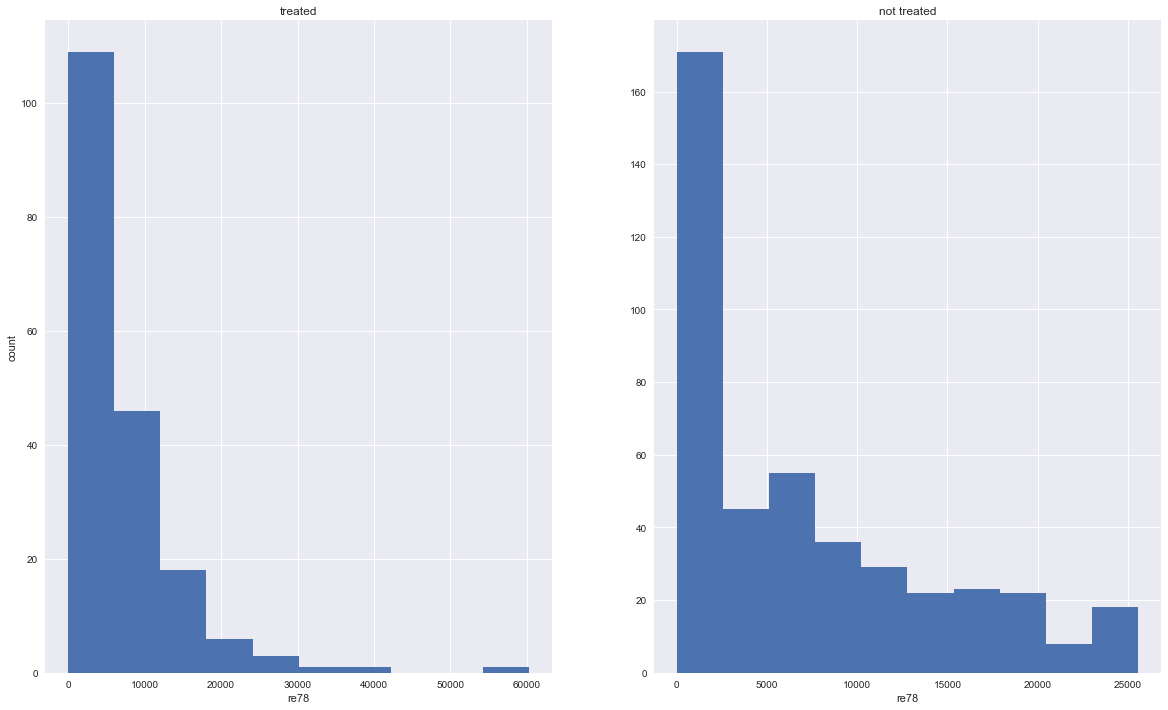

In [307]:
fig, axs = plt.subplots(1, 2, figsize=(20,12))

lalonde_treat.re78.hist(ax=axs[0])
lalonde_notreat.re78.hist(ax=axs[1])
axs[0].set_xlabel("re78")
axs[0].set_title("treated")
axs[1].set_xlabel("re78")
axs[1].set_title("not treated")
axs[0].set_ylabel("count")
plt.show()

In [308]:
lalonde_treat.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [309]:
lalonde_notreat.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

* To conclude this first analysis, we will show the correlation matrix.

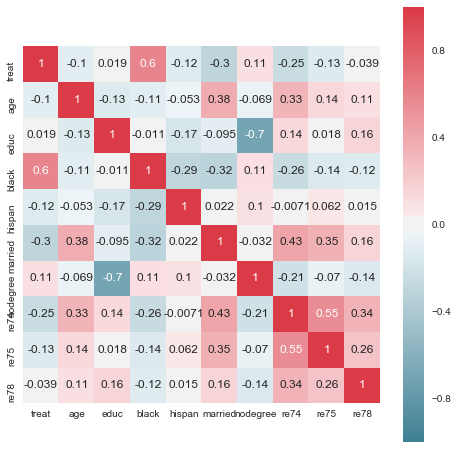

In [310]:
figure, ax = plt.subplots(figsize=(8,8))
corr = lalonde.corr()

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

* We can see that black people are in part correlated with the treatment, as we saw in the distributions above.

* Taking a closer look to the data we can see some inconsistencies in what we are doing: we are not comparing people we the same features and seeing the different results between them. The two groups, treated and control, are very different in a lot of different aspects, so it's difficult to say that we are looking in the right way. And that's why the results show us that people in the control group have an actual income that is higher than the one of the people in the treated group, because these results are wrong.

## Part 3

Task: A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset. You may use sklearn to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups. (See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores. If you want even more information, read this article.)

In [311]:
'''
Gain 2%
'''
def normalize(x_par):
    
    x = x_par
    
    for column in x.columns:
        x[column] = (x[column] - x[column].mean())/x[column].std()
        
    return x

* Here we fit/train logistic regression in order to obtain a propensity score model. The propensity score is the probability that a patient is being treated given some features (covariates). Suppose that we have a binary treatment T, an outcome Y, and background variables X. The propensity score is defined as the conditional probability of treatment given background variables:

In [312]:
%%latex
\begin{align}
p(x)\ {\stackrel  {{\mathrm  {def}}}{=}}\ \Pr(T=1|X=x).
\end{align}

<IPython.core.display.Latex object>

###### We should work a little bit more on the data maybe if we want to obtain a better score.
* We also normalize the data because we obtain a better score. Of course we don't use the columns id and treat because they are not features - treat is the label - and also re78 because it refers to something that happened after being treated or not.

In [313]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
y = lalonde.treat
X = lalonde.drop(['id','treat', 're78'], axis=1)
#X = pd.concat([X, np.log(X.age).rename("age_log")], axis=1)
#X = pd.concat([X, np.log(X.re78+0.1).rename("age_log")], axis=1)

#X = build_poly(X, 2)
X[['age', 'educ', 're74', 're75']] = normalize(X[['age', 'educ', 're74', 're75']])

logistic.fit(X, y)
prediction = logistic.predict(X)
accuracy = sum(prediction == y) / len(y)
accuracy *100

/Users/lorenzotara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


82.247557003257327

* The variable pred_proba is a ndarray of two dimensions: the first dimension is the probability that the patient is not treated (0), the second one is the propensity score, that is the probability that the patient is treated (1).

In [314]:
pred_proba = logistic.predict_proba(X)
pred_proba[:8]

array([[ 0.40910643,  0.59089357],
       [ 0.79031334,  0.20968666],
       [ 0.3177639 ,  0.6822361 ],
       [ 0.25265472,  0.74734528],
       [ 0.30822102,  0.69177898],
       [ 0.31415395,  0.68584605],
       [ 0.33827987,  0.66172013],
       [ 0.24030611,  0.75969389]])

## Part 4

Task: Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group. (Hint: you may explore the networkx package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores. In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects. Compare the outcomes (re78) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects. What do you observe? Are you closer to being able to draw valid conclusions now than you were before?

* First we just take the propensity score of all the samples we have.

In [315]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

pscore = pred_proba[:,1]
pscore[:10]

array([ 0.59089357,  0.20968666,  0.6822361 ,  0.74734528,  0.69177898,
        0.68584605,  0.66172013,  0.75969389,  0.75623347,  0.0601449 ])

* We add the propensity score to the total dataframe: matching_df.

In [316]:
matching_df = lalonde
matching_df['propensity'] = pscore
matching_df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.590894
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.209687
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.682236
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.747345
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.691779


* We save the propensity score of the treated and of the not treated in two different variables.

In [317]:
propensity_treat = matching_df[matching_df.treat == 1].propensity
propensity_notreat = matching_df[matching_df.treat == 0].propensity
propensity_treat.head(), propensity_notreat.head()

(0    0.590894
 1    0.209687
 2    0.682236
 3    0.747345
 4    0.691779
 Name: propensity, dtype: float64, 185    0.037950
 186    0.023885
 187    0.032949
 188    0.045703
 189    0.415629
 Name: propensity, dtype: float64)

* In order to have comparable data we have to find for every 'patient' in the treated group the persone in the control group that is the most similar to him considering only the propensity score. Working in this way, we will get two different, but comparable, dataframes, one composed by treated workers and the other one composed by the matches of the first df on the control group df.
* Said so, we are going to use bipartite matching design in order to find the optimal match of a treated in the non treated taking account of only the propensity score.

#### Using bipartite matching design

In [318]:
matching_df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.590894
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.209687
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.682236
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.747345
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.691779


In [319]:
import networkx as nx
from networkx.algorithms import bipartite

* After creating the bipartite graph, we are going to add all the edges (every element from the treat_df will be linked with every element of the notreat_df). We add a weight to the edges in order to find later the max_weight_matching, that will return the best match for every treated element. The weight function is the inverse of absolute value of the difference of the propensity score of the two nodes (1/abs(treated_propensity - nontreated_propensity)

In [320]:
# treated group
treat_df = matching_df[matching_df.treat == 1]
# control group
notreat_df = matching_df[matching_df.treat == 0]
C = nx.Graph()
# Adding the nodes of the treated with attribute 0
C.add_nodes_from(range(treat_df.shape[0]), bipartite=0) # Add the node attribute "bipartite"
# Adding the nodes of the control with attribute 1
C.add_nodes_from(range(notreat_df.shape[0]), bipartite=1)

# Creating the edges: every treated patient will be linked with evert patient in the control group
for i, elem0 in treat_df.iterrows():
    for j, elem1 in notreat_df.iterrows():
        # We add a very small number to the function in order to avoid a 0 division
        C.add_edge(i,j, weight=abs(1/(elem0.propensity-elem1.propensity + 0.0001)))  

matches_bipartite = nx.max_weight_matching(C)

In [321]:
matches_index = list(matches_bipartite.values())
matches_index = [i for i in matches_index if i>=185]
matches_index
bipartite_matches = notreat_df.loc[matches_index]

In [322]:
bipartite_matches.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
192,PSID8,0,20,12,1,0,0,0,7392.3140,12396.1900,17765.230,0.682352
536,PSID352,0,24,12,1,0,0,0,566.2281,0.0000,2284.565,0.655858
418,PSID234,0,19,13,1,0,0,0,1714.3580,785.9516,9067.330,0.658862
211,PSID27,0,36,9,1,0,1,1,13256.4000,8457.4840,0.000,0.410253
429,PSID245,0,21,13,0,0,0,0,513.3279,578.2742,0.000,0.125034


### Comparing distributions between treated and matches - BIPARTITE

#### re78 - bipartite

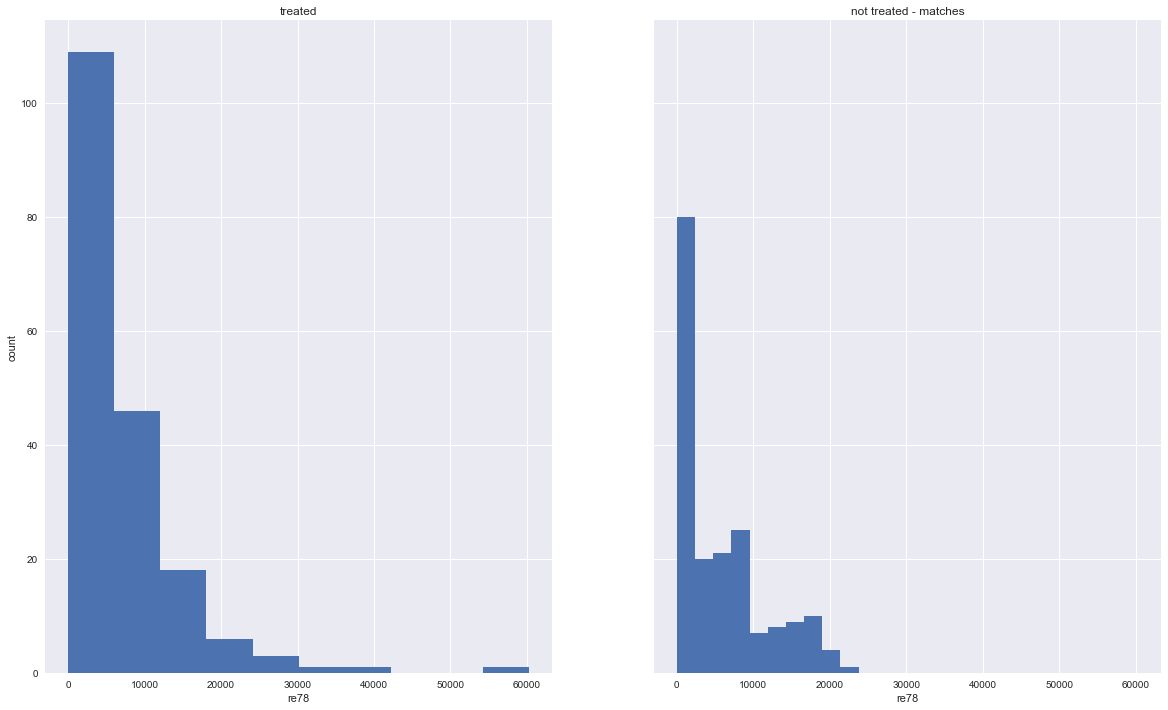

In [323]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

treat_df.re78.hist(ax=axs[0])
bipartite_matches.re78.hist(ax=axs[1])
axs[0].set_xlabel("re78")
axs[0].set_title("treated")
axs[1].set_xlabel("re78")
axs[1].set_title("not treated - matches")
axs[0].set_ylabel("count")
plt.show()

In [324]:
treat_df.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [325]:
bipartite_matches.re78.describe()

count      185.000000
mean      5590.119827
std       5976.731488
min          0.000000
25%         94.574500
50%       3707.616000
75%       8900.347000
max      23764.800000
Name: re78, dtype: float64

* Now that we have comparable data, we have also complete different results: now it's clear that the treatment worked! Let's see some statistics: the mean of the treated is way higher than the control group (~50% more), the median of the treatment is 4232.31, the one of the control is 3707.62, there is a positive gap between the two.

#### Age - bipartite

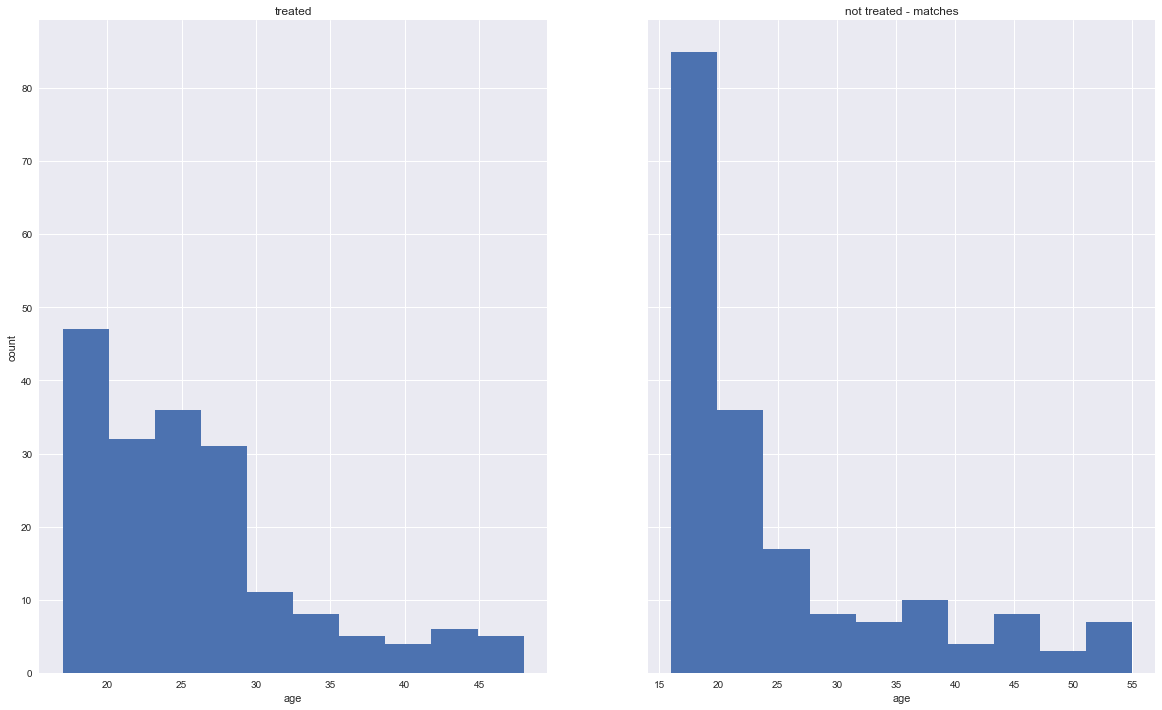

In [326]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharey=True)

treat_df.age.hist(ax=axs[0])
bipartite_matches.age.hist(ax=axs[1])
axs[0].set_xlabel("age")
axs[0].set_title("treated")
axs[1].set_xlabel("age")
axs[1].set_title("not treated - matches")
axs[0].set_ylabel("count")
plt.show()

In [327]:
treat_df.age.describe()

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

In [328]:
bipartite_matches.age.describe()

count    185.000000
mean      24.756757
std       10.413738
min       16.000000
25%       18.000000
50%       20.000000
75%       28.000000
max       55.000000
Name: age, dtype: float64

* For what concerns the ages of the people in the two groups, we can say a couple of new things: people that are too young, between 17 and 20 years old, have more chances of not being treated. Instead, people in range [25,30] years old seems to be more suitable for the treatment program. The two distributions are very different, so in the future maybe we can balance them a little more.

#### Education - bipartite

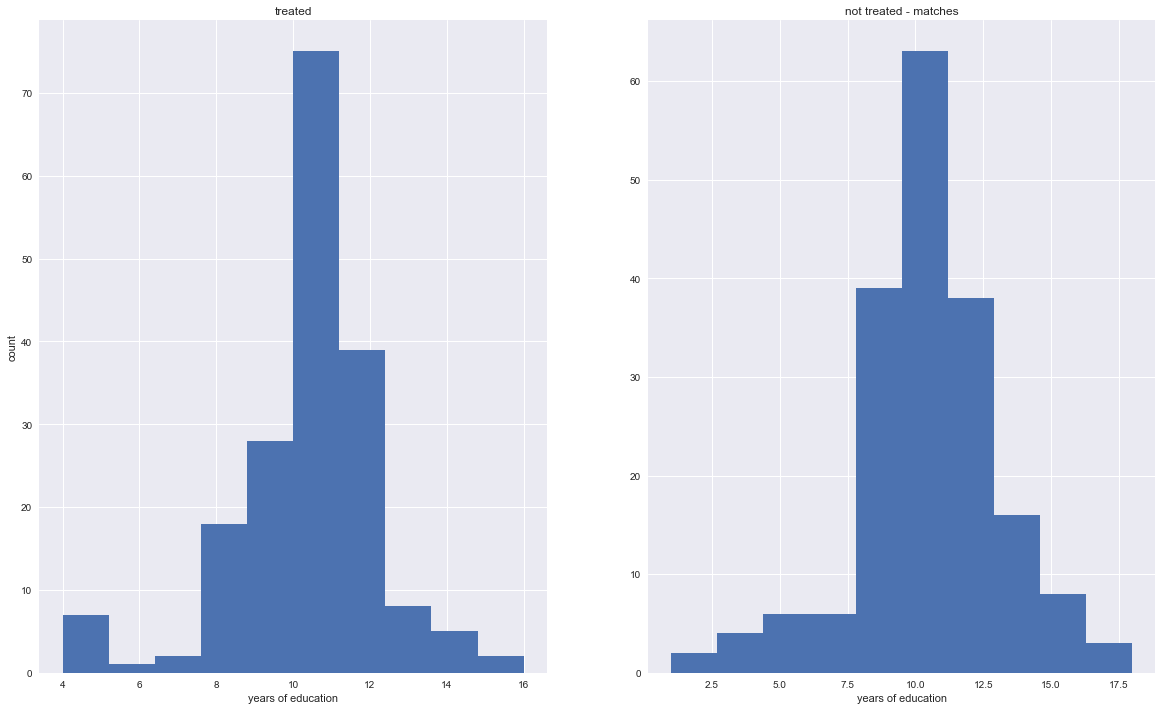

In [329]:
fig, axs = plt.subplots(1, 2, figsize=(20,12))

treat_df.educ.hist(ax=axs[0])
bipartite_matches.educ.hist(ax=axs[1])
axs[0].set_xlabel("years of education")
axs[0].set_title("treated")
axs[1].set_xlabel("years of education")
axs[1].set_title("not treated - matches")
axs[0].set_ylabel("count")
plt.show()

In [330]:
treat_df.educ.describe()

count    185.000000
mean      10.345946
std        2.010650
min        4.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       16.000000
Name: educ, dtype: float64

In [331]:
bipartite_matches.educ.describe()

count    185.000000
mean      10.470270
std        2.662222
min        1.000000
25%        9.000000
50%       11.000000
75%       12.000000
max       18.000000
Name: educ, dtype: float64

* The two distributions are very similar as they were before, for this reason education probably is not an important feature.

#### Categories - bipartite

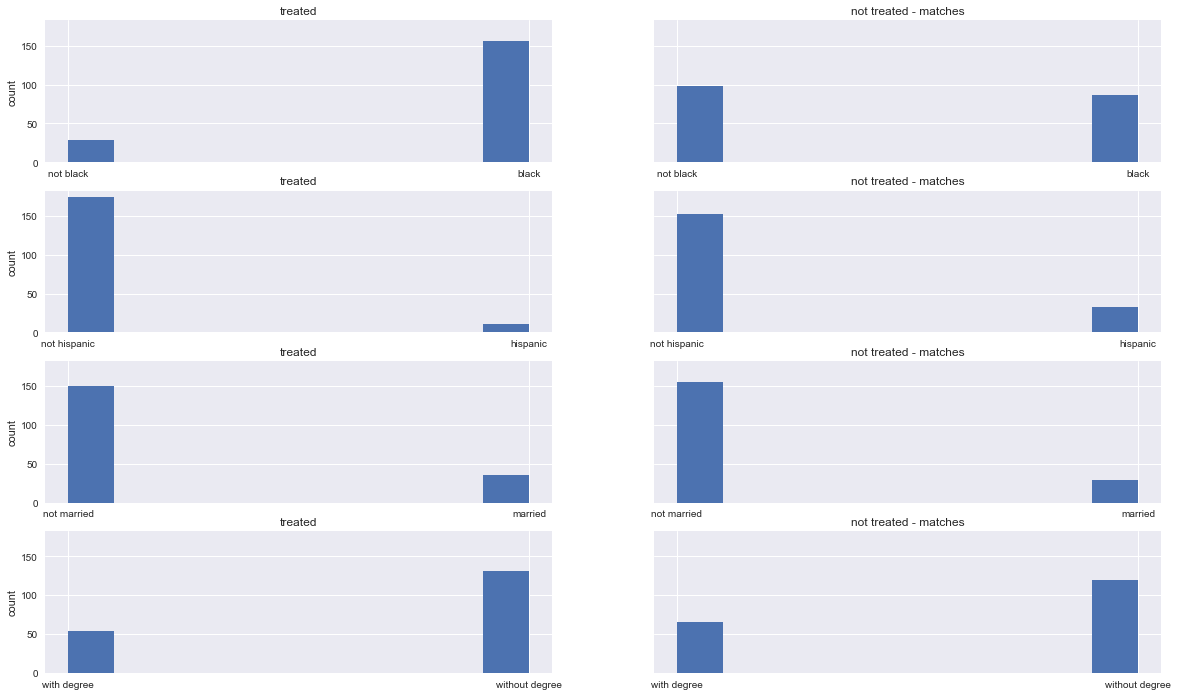

In [332]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharey=True)

treat_df.black.hist(ax=axs[0,0])
bipartite_matches.black.hist(ax=axs[0,1])
axs[0,0].set_xticks(np.array([0,1]))
axs[0,0].set_xticklabels(['not black', 'black'])
axs[0,0].set_title("treated")
axs[0,1].set_xticks(np.array([0,1]))
axs[0,1].set_xticklabels(['not black', 'black'])
axs[0,1].set_title("not treated - matches")
axs[0,0].set_ylabel("count")

treat_df.hispan.hist(ax=axs[1,0])
bipartite_matches.hispan.hist(ax=axs[1,1])
axs[1,0].set_xticks(np.array([0,1]))
axs[1,0].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,0].set_title("treated")
axs[1,1].set_xticks(np.array([0,1]))
axs[1,1].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,1].set_title("not treated - matches")
axs[1,0].set_ylabel("count")

treat_df.married.hist(ax=axs[2,0])
bipartite_matches.married.hist(ax=axs[2,1])
axs[2,0].set_xticks(np.array([0,1]))
axs[2,0].set_xticklabels(['not married', 'married'])
axs[2,0].set_title("treated")
axs[2,1].set_xticks(np.array([0,1]))
axs[2,1].set_xticklabels(['not married', 'married'])
axs[2,1].set_title("not treated - matches")
axs[2,0].set_ylabel("count")

treat_df.nodegree.hist(ax=axs[3,0])
bipartite_matches.nodegree.hist(ax=axs[3,1])
axs[3,0].set_xticks(np.array([0,1]))
axs[3,0].set_xticklabels(['with degree', 'without degree'])
axs[3,0].set_title("treated")
axs[3,1].set_xticks(np.array([0,1]))
axs[3,1].set_xticklabels(['with degree', 'without degree'])
axs[3,1].set_title("not treated - matches")
axs[3,0].set_ylabel("count")

plt.show()

* Do you remember when in Part 2 we asked this question: "From these graphs two things are clear: if a person is african-american or if it is without a degree has more chances to be chosen for the treatment. Now the question is: these data are a consequence or a reason for being chosen to be part of the treatment? We will answer to this question later in the study." As already stated, the results were wrong, because we were looking at the data in the wrong way, so the question was wrong as well! This is a good example of the importance of looking at the data in a good and scientific way, trying to go as deeper as you can.
* So, the answer is that we can see that there are no differences in the categories except for black people. The categorical features are not important for the propensity score except for the first one probably.

#### re74, re75  - bipartite

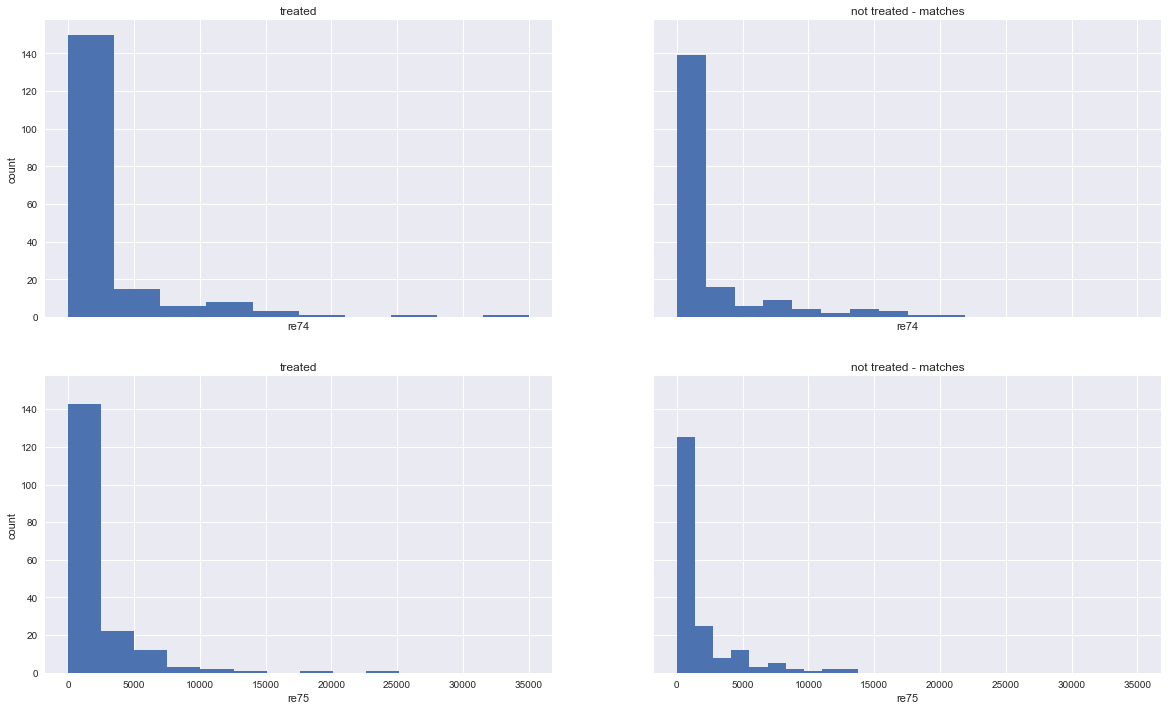

In [333]:
fig, axs = plt.subplots(2, 2, figsize=(20,12), sharex=True, sharey=True)

treat_df.re74.hist(ax=axs[0,0])
bipartite_matches.re74.hist(ax=axs[0,1])
treat_df.re75.hist(ax=axs[1,0])
bipartite_matches.re75.hist(ax=axs[1,1])
axs[0,0].set_xlabel("re74")
axs[0,0].set_title("treated")
axs[0,1].set_xlabel("re74")
axs[0,1].set_title("not treated - matches")
axs[0,0].set_ylabel("count")
axs[1,0].set_xlabel("re75")
axs[1,0].set_title("treated")
axs[1,1].set_xlabel("re75")
axs[1,1].set_title("not treated - matches")
axs[1,0].set_ylabel("count")
plt.show()

In [334]:
treat_df.re74.describe()

count      185.000000
mean      2095.573689
std       4886.620353
min          0.000000
25%          0.000000
50%          0.000000
75%       1291.468000
max      35040.070000
Name: re74, dtype: float64

In [335]:
bipartite_matches.re74.describe()

count      185.000000
mean      2206.621625
std       4095.238528
min          0.000000
25%          0.000000
50%        321.319800
75%       2068.986000
max      21918.320000
Name: re74, dtype: float64

In [336]:
treat_df.re75.describe()

count      185.000000
mean      1532.055314
std       3219.250870
min          0.000000
25%          0.000000
50%          0.000000
75%       1817.284000
max      25142.240000
Name: re75, dtype: float64

In [337]:
bipartite_matches.re75.describe()

count      185.000000
mean      1551.232221
std       2619.075113
min          0.000000
25%          0.000000
50%        297.193500
75%       1693.645000
max      13776.530000
Name: re75, dtype: float64

* We can clearly see that the distributions between the two groups are imbalanced, so probably we will have to work more on these ones (see part 5).

* We can say that now we are able to draw more valid conclusions than before, because, using the matches we found from the treated group, we are comparing two dataframes where the data have similar features values. Like we already said, doing this comparison, we have found that the treatment actually worked, increasing the income of the people that participated to the experiment.

## Part 5

Task: Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching? Would you say your dataset is sufficiently balanced? If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature. Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.

* Answer: Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching? Would you say your dataset is sufficiently balanced? If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?
##### Even if our conclusions were more reliable than before, we can still see some imbalance between the two datasets and, as suggested, we can make sure that the features (age, ???education???NO) with imbalanced distributions will match better than before.

* Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature. Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.

* We believe that the 'problematic features' are also the earnings of the person the previous year of the training and also his age. We thought that these two features are the critical ones because earnings and age are what define a job's situation of a person... REVIEW

In [235]:
matching_df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.590894
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.209687
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.682236
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.747345
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.691779


In [236]:
treated_features = matching_df[matching_df.treat == 1][['re74', 're75', 'propensity']]
notreated_features = matching_df[matching_df.treat == 0][['re74', 're75', 'propensity']]

treated_features.head(), notreated_features.head()

(   re74  re75  propensity
 0   0.0   0.0    0.590894
 1   0.0   0.0    0.209687
 2   0.0   0.0    0.682236
 3   0.0   0.0    0.747345
 4   0.0   0.0    0.691779,          re74      re75  propensity
 185  20166.73  18347.23    0.037950
 186  25862.32  17806.55    0.023885
 187  25862.32  15316.21    0.032949
 188  21787.05  14265.29    0.045703
 189  14829.69  13776.53    0.415629)

### TODO RIVEDERE PARAMETRI
* Here we use again 'bipartite matching' in order to find the matches, this time considering not only propensity, but also age and re75.

In [264]:
def weight_function(elem0, elem1):
    
    age_difference = abs(elem0.age - elem1.age)
    re75_difference = abs(elem0.re75 - elem1.re75)
    ps_difference = abs(elem0.propensity - elem1.propensity)
    
    return 1/(0.25 * age_difference + 0.25 * re75_difference + 0.5 * ps_difference + 0.0001)
    
# treated group
treated_critical = matching_df[matching_df.treat == 1]
# control group
notreat_df = matching_df[matching_df.treat == 0]

# Normalizing data in order to give every difference the same weight
norm_treat_df = normalize(treated_critical[['age', 're75']])
norm_treat_df['propensity'] = treated_critical.propensity
norm_notreat_df = normalize(notreat_df[['age', 're75']])
norm_notreat_df['propensity'] = notreat_df.propensity

C = nx.Graph()
# Adding the nodes of the treated with attribute 0
C.add_nodes_from(range(treated_critical.shape[0]), bipartite=0) # Add the node attribute "bipartite"
# Adding the nodes of the control with attribute 1
C.add_nodes_from(range(notreat_df.shape[0]), bipartite=1)

# Creating the edges: every treated patient will be linked with evert patient in the control group
for i, elem0 in norm_treat_df.iterrows():
    for j, elem1 in norm_notreat_df.iterrows():
        # We add a very small number to the function in order to avoid a 0 division
        C.add_edge(i,j, weight=weight_function(elem0, elem1))  

matches_bipartite = nx.max_weight_matching(C)

/Users/lorenzotara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lorenzotara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/lorenzotara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [265]:
matches_index = list(matches_bipartite.values())
matches_index = [i for i in matches_index if i>=185]
matches_critical = notreat_df.loc[matches_index]

In [266]:
matches_critical.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
415,PSID231,0,18,11,1,0,0,1,587.780,841.4516,7933.914,0.724699
332,PSID148,0,24,10,0,0,1,1,4719.874,2565.5320,2173.736,0.056192
414,PSID230,0,27,15,0,0,0,0,0.000,857.5645,3392.860,0.171040
382,PSID198,0,21,14,0,0,0,0,8456.196,1330.2100,16967.260,0.087858
418,PSID234,0,19,13,1,0,0,0,1714.358,785.9516,9067.330,0.658862


In [267]:
# nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(notreated_features)
# '''
# distances is an array that contains the distance between the treated patient 
# and his nearest neighbor in the not treated patients dataset
# '''
# distances, indices = nbrs.kneighbors(treated_features)
# '''
# These are the indices that refers to the position (not the real index!!!)
# of the neighbor in the list propensity_notreat.values.reshape(-1,1)
# '''
# indices = indices.reshape(indices.shape[0])
# 
# matches_critical = matching_df[matching_df.treat == 0].iloc[indices]
# treated_critical = matching_df[matching_df.treat == 1]
# matches_critical[['age','re75','propensity']].head(), treated_critical[['age','re75','propensity']].head()

### Comparing distributions between treated and matches with critical features

* First we are going to compare the final income of the treated group and the control group.
* We should find more balance between the two groups than before because we didn't use only propensity score, but also critical features.

#### re78

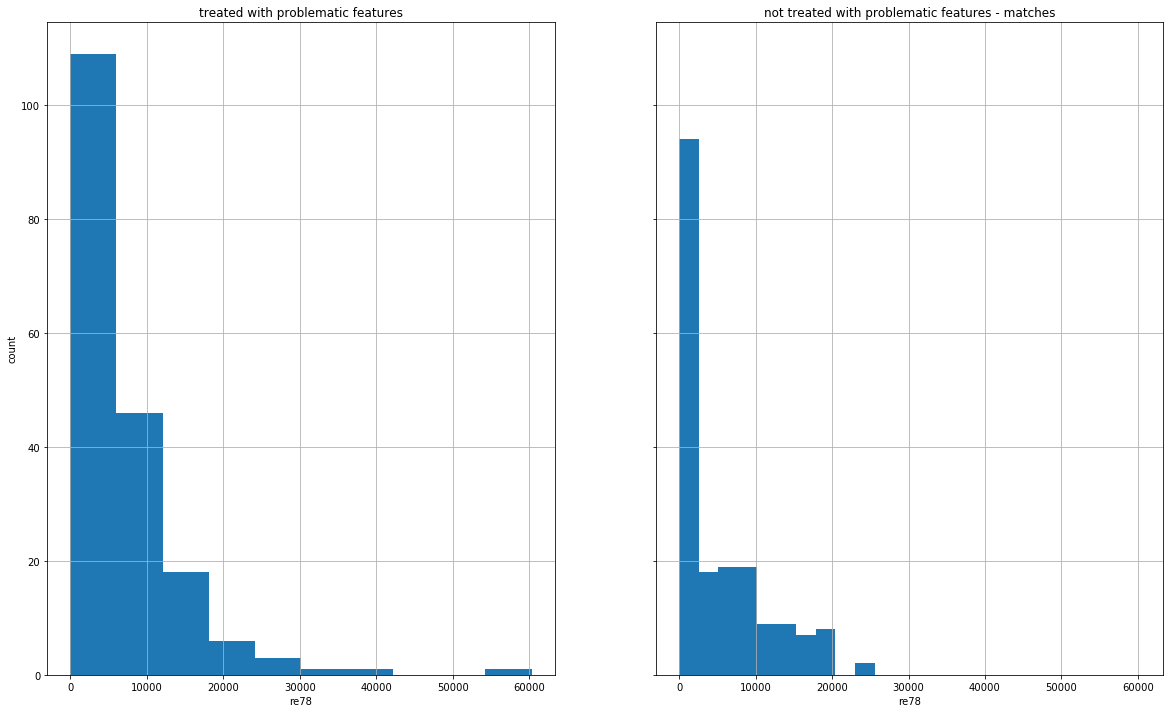

In [268]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

treated_critical.re78.hist(ax=axs[0])
matches_critical.re78.hist(ax=axs[1])
axs[0].set_xlabel("re78")
axs[0].set_title("treated with problematic features")
axs[1].set_xlabel("re78")
axs[1].set_title("not treated with problematic features - matches")
axs[0].set_ylabel("count")
plt.show()

In [269]:
treated_critical.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [270]:
matches_critical.re78.describe()

count      185.000000
mean      5172.650076
std       6094.327345
min          0.000000
25%          0.000000
50%       2404.261000
75%       8547.171000
max      25564.670000
Name: re78, dtype: float64

#### Age

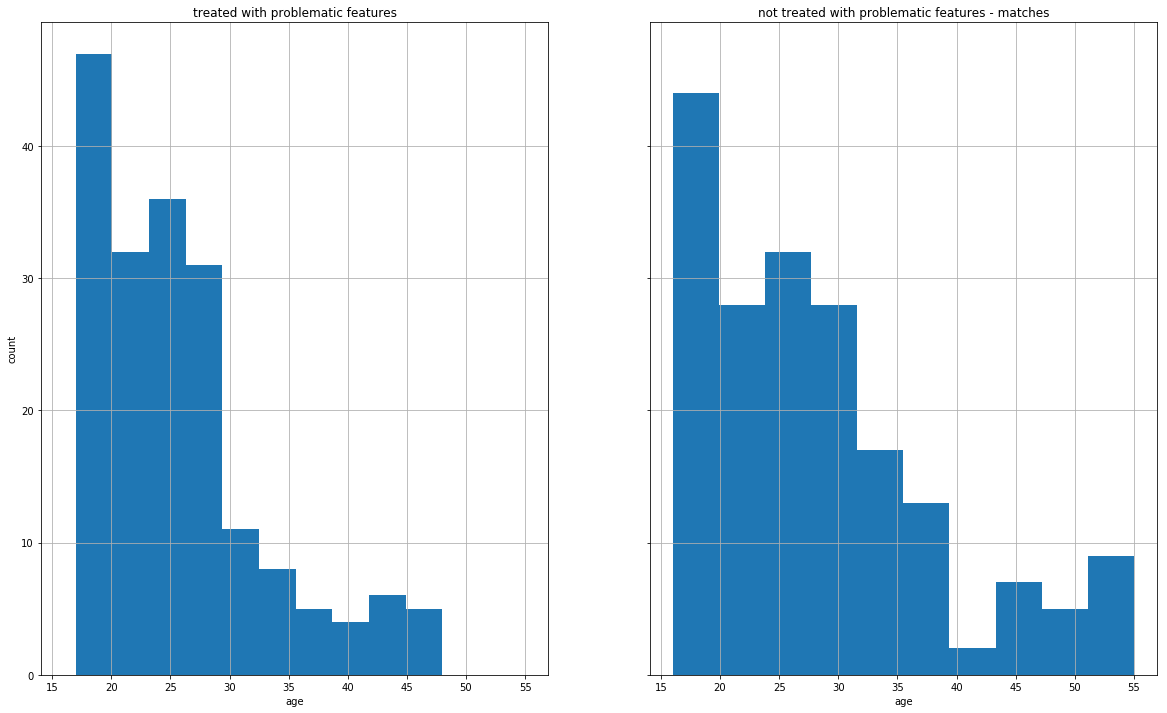

In [271]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

treated_critical.age.hist(ax=axs[0])
matches_critical.age.hist(ax=axs[1])
axs[0].set_xlabel("age")
axs[0].set_title("treated with problematic features")
axs[1].set_xlabel("age")
axs[1].set_title("not treated with problematic features - matches")
axs[0].set_ylabel("count")
plt.show()

In [272]:
treated_critical.age.describe()

count    185.000000
mean      25.816216
std        7.155019
min       17.000000
25%       20.000000
50%       25.000000
75%       29.000000
max       48.000000
Name: age, dtype: float64

In [273]:
matches_critical.age.describe()

count    185.000000
mean      28.129730
std       10.245064
min       16.000000
25%       20.000000
50%       26.000000
75%       32.000000
max       55.000000
Name: age, dtype: float64

#### Education

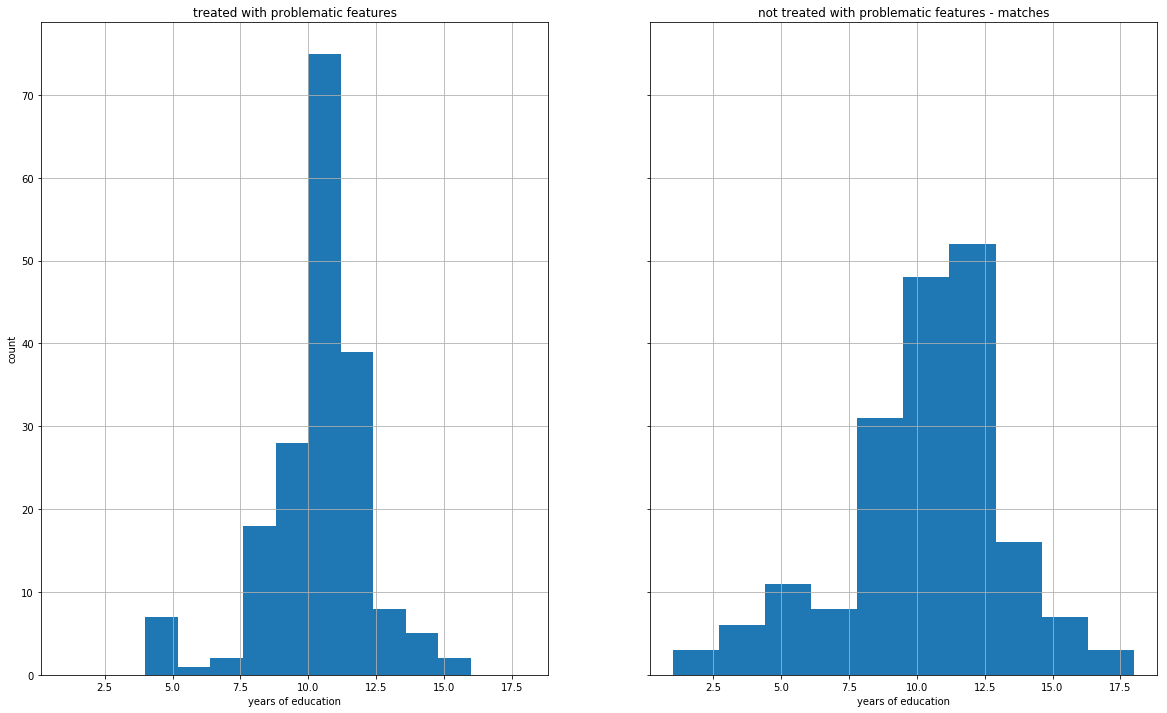

In [274]:
fig, axs = plt.subplots(1, 2, figsize=(20,12), sharex=True, sharey=True)

treated_critical.educ.hist(ax=axs[0])
matches_critical.educ.hist(ax=axs[1])
axs[0].set_xlabel("years of education")
axs[0].set_title("treated with problematic features")
axs[1].set_xlabel("years of education")
axs[1].set_title("not treated with problematic features - matches")
axs[0].set_ylabel("count")
plt.show()

#### Categories

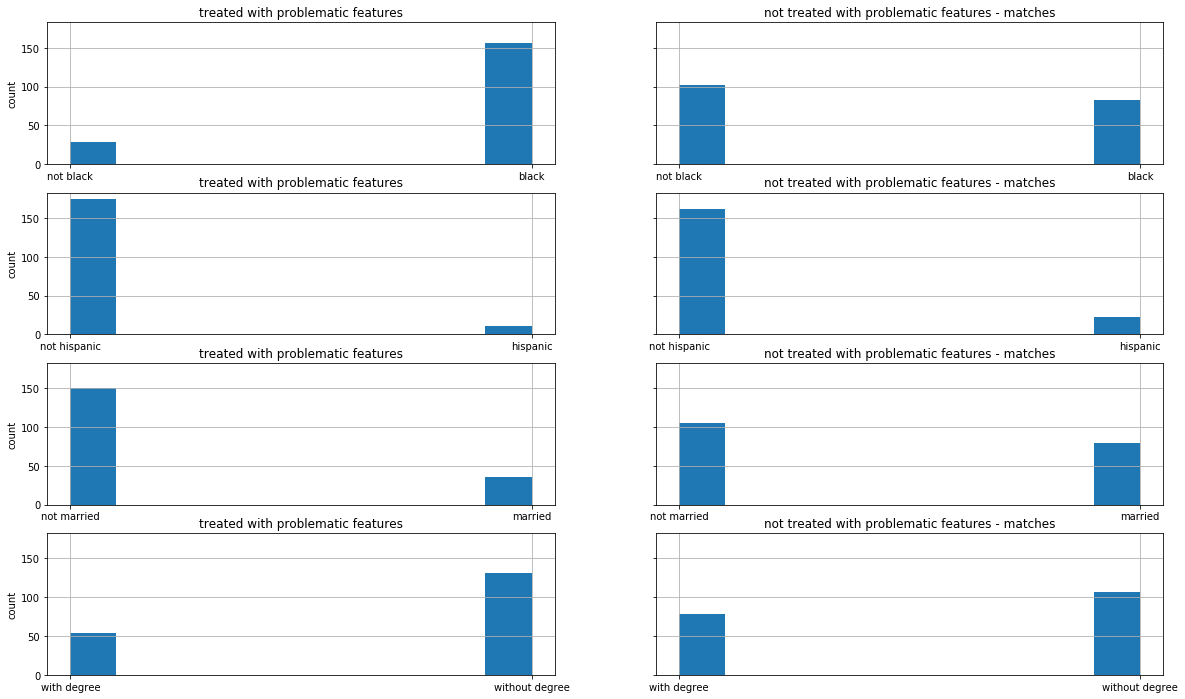

In [275]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharey=True)

treated_critical.black.hist(ax=axs[0,0])
matches_critical.black.hist(ax=axs[0,1])
axs[0,0].set_xticks(np.array([0,1]))
axs[0,0].set_xticklabels(['not black', 'black'])
axs[0,0].set_title("treated with problematic features")
axs[0,1].set_xticks(np.array([0,1]))
axs[0,1].set_xticklabels(['not black', 'black'])
axs[0,1].set_title("not treated with problematic features - matches")
axs[0,0].set_ylabel("count")

treated_critical.hispan.hist(ax=axs[1,0])
matches_critical.hispan.hist(ax=axs[1,1])
axs[1,0].set_xticks(np.array([0,1]))
axs[1,0].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,0].set_title("treated with problematic features")
axs[1,1].set_xticks(np.array([0,1]))
axs[1,1].set_xticklabels(['not hispanic', 'hispanic'])
axs[1,1].set_title("not treated with problematic features - matches")
axs[1,0].set_ylabel("count")

treated_critical.married.hist(ax=axs[2,0])
matches_critical.married.hist(ax=axs[2,1])
axs[2,0].set_xticks(np.array([0,1]))
axs[2,0].set_xticklabels(['not married', 'married'])
axs[2,0].set_title("treated with problematic features")
axs[2,1].set_xticks(np.array([0,1]))
axs[2,1].set_xticklabels(['not married', 'married'])
axs[2,1].set_title("not treated with problematic features - matches")
axs[2,0].set_ylabel("count")

treated_critical.nodegree.hist(ax=axs[3,0])
matches_critical.nodegree.hist(ax=axs[3,1])
axs[3,0].set_xticks(np.array([0,1]))
axs[3,0].set_xticklabels(['with degree', 'without degree'])
axs[3,0].set_title("treated with problematic features")
axs[3,1].set_xticks(np.array([0,1]))
axs[3,1].set_xticklabels(['with degree', 'without degree'])
axs[3,1].set_title("not treated with problematic features - matches")
axs[3,0].set_ylabel("count")

plt.show()

#### re74, re75

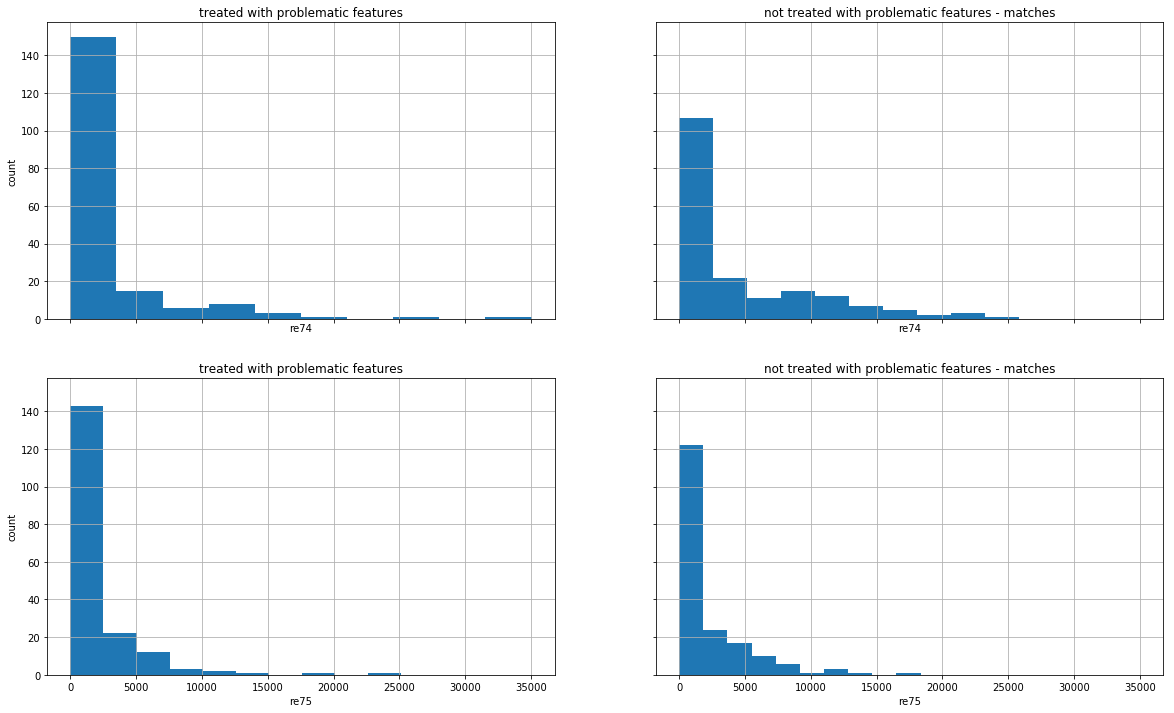

In [276]:
fig, axs = plt.subplots(2, 2, figsize=(20,12), sharex=True, sharey=True)

treated_critical.re74.hist(ax=axs[0,0])
matches_critical.re74.hist(ax=axs[0,1])
treated_critical.re75.hist(ax=axs[1,0])
matches_critical.re75.hist(ax=axs[1,1])
axs[0,0].set_xlabel("re74")
axs[0,0].set_title("treated with problematic features")
axs[0,1].set_xlabel("re74")
axs[0,1].set_title("not treated with problematic features - matches")
axs[0,0].set_ylabel("count")
axs[1,0].set_xlabel("re75")
axs[1,0].set_title("treated with problematic features")
axs[1,1].set_xlabel("re75")
axs[1,1].set_title("not treated with problematic features - matches")
axs[1,0].set_ylabel("count")
plt.show()

In [277]:
treated_critical.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,1.0,25.816216,10.345946,0.843243,0.059459,0.189189,0.708108,2095.573689,1532.055314,6349.143530,0.568465
std,0.0,7.155019,2.010650,0.364558,0.237124,0.392722,0.455867,4886.620353,3219.250870,7867.402218,0.208722
min,1.0,17.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034960
25%,1.0,20.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,485.229800,0.522221
50%,1.0,25.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4232.309000,0.658737
75%,1.0,29.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1291.468000,1817.284000,9642.999000,0.710346
max,1.0,48.000000,16.000000,1.000000,1.000000,1.000000,1.000000,35040.070000,25142.240000,60307.930000,0.828545


In [278]:
matches_critical.describe()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity
count,185.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.0,28.129730,10.356757,0.448649,0.124324,0.432432,0.578378,4262.528040,2045.380658,5172.650076,0.324301
std,0.0,10.245064,2.934478,0.498706,0.330847,0.496758,0.495159,5716.131125,3035.660935,6094.327345,0.270458
min,0.0,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015209
25%,0.0,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072618
50%,0.0,26.000000,11.000000,0.000000,0.000000,0.000000,1.000000,1469.450000,857.564500,2404.261000,0.200632
75%,0.0,32.000000,12.000000,1.000000,0.000000,1.000000,1.000000,7578.444000,2968.355000,8547.171000,0.638362
max,0.0,55.000000,18.000000,1.000000,1.000000,1.000000,1.000000,25862.320000,18347.230000,25564.670000,0.763729


#### SAY SOMETHING ABOUT THESE BALANCED PLOTS

## Part 6

Task: A less naive analysis

Compare the outcomes (re78) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5. What do you conclude about the effectiveness of the job training program?

* In this section we come back on point 1, in order to show the differcens between the first section and the 5th one.

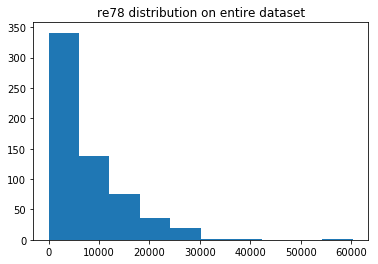

In [258]:
fig, ax = plt.subplots()
ax.hist(lalonde.re78)
ax.set_title("re78 distribution on entire dataset")
plt.show()

* Here we show the distributions of re78 first on treated subjects dataset and then on the not treated subjects dataset.

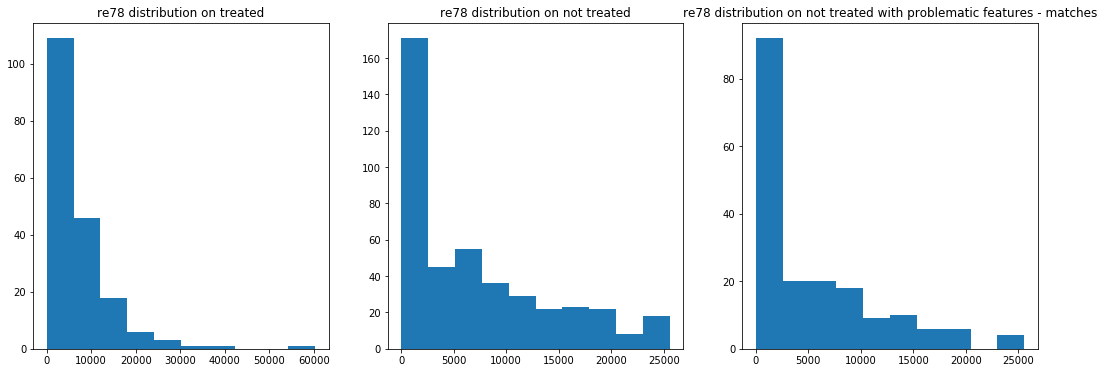

In [259]:
lalonde_treat = lalonde[lalonde.treat == 1]
lalonde_notreat = lalonde[lalonde.treat == 0]

fig, axs = plt.subplots(1, 3, figsize=(18,6))

axs[0].hist(lalonde_treat.re78)
axs[0].set_title("re78 distribution on treated")
axs[1].hist(lalonde_notreat.re78)
axs[1].set_title("re78 distribution on not treated")
axs[2].hist(matches_critical.re78)
axs[2].set_title("re78 distribution on not treated with problematic features - matches")
plt.show()

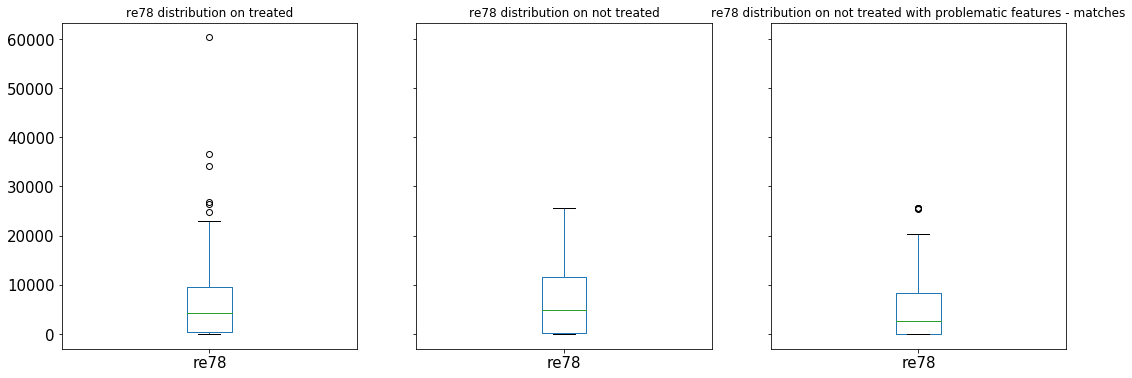

In [260]:
fig, axs = plt.subplots(1, 3, figsize=(18,6), sharey=True)

lalonde_treat[['re78']].boxplot(ax=axs[0], fontsize=15, grid=False)
axs[0].set_title("re78 distribution on treated")
lalonde_notreat[['re78']].boxplot(ax=axs[1], fontsize=15, grid=False)
axs[1].set_title("re78 distribution on not treated")
matches_critical[['re78']].boxplot(ax=axs[2], fontsize=15, grid=False)
axs[2].set_title("re78 distribution on not treated with problematic features - matches")
plt.show()

In [261]:
lalonde_treat.re78.describe()

count      185.000000
mean      6349.143530
std       7867.402218
min          0.000000
25%        485.229800
50%       4232.309000
75%       9642.999000
max      60307.930000
Name: re78, dtype: float64

In [262]:
lalonde_notreat.re78.describe()

count      429.000000
mean      6984.169742
std       7294.161791
min          0.000000
25%        220.181300
50%       4975.505000
75%      11688.820000
max      25564.670000
Name: re78, dtype: float64

In [263]:
matches_critical.re78.describe()

count      185.000000
mean      5231.335847
std       6233.547783
min          0.000000
25%          0.000000
50%       2664.341000
75%       8245.714000
max      25564.670000
Name: re78, dtype: float64

### With this more complete analysis we can conclude that... What do you conclude about the effectiveness of the job training program?... TODO!!!

# Task 2

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!
- Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn (link). TF-IDF, short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using TfidfVectorizer. Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

### Answer

- Firstly, we are going to import all the needed functions and then we download the dataset from scikit learn as suggested by their documentation:

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from operator import itemgetter

In [2]:
newsgroups_all = fetch_20newsgroups(subset='all')

- Now, we create the TF-IDF matrix to compute feitures. We use the default stop-words:

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_matrix = vectorizer.fit_transform(newsgroups_all.data)

- Here, we save the features names:

In [4]:
feature_names = vectorizer.get_feature_names()

- After this, we can split our dataset in 80% for training, 10% for test and 10% for validation. First we are going to split in 80% train and 20% test. Then, we will split again the 20% test in two parts: test and validation.

In [5]:
# split in 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, newsgroups_all.target, test_size=0.20, random_state=42)

# split the 20% test in two parts: test and validation set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

## Question 2

- Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the feature_importances_ attribute of your random forest and discuss the obtained results.

### Answer

- Now, first we will build a model with RandomForestClassifier from sklearn with default parameters:

In [6]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- we compute the prediction using the model just built on the input test set:

In [7]:
predict = rfc.predict(X_test)

- Below you can see the accuracy score of our model on the test set:

In [8]:
accuracy_score(y_test, predict)

0.7363395225464191

- Here we evaluate the confusion matrix and then we'll show it using seaborn heatMap for a better visualization:

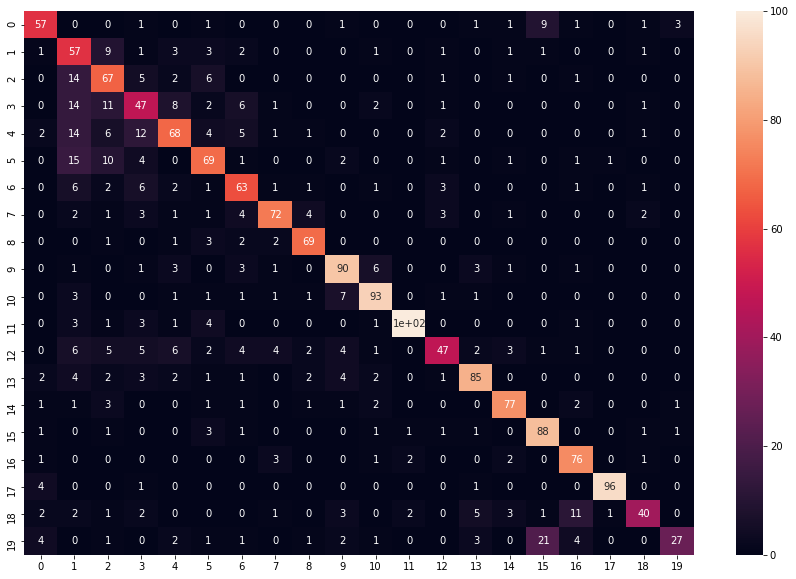

In [9]:
conf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize=(15, 10))

sn.heatmap(conf_matrix, annot=True)
plt.show()

## ADD OBSERVATIONS

- After this first results, we want to improve our model for prediction. Therefore, we want to find better values for the hyperparameters 'n_estimators' and 'max_depth'. For this reason, we will try different values for these hyperparameters for the RandomForestClassifier, trying all the combination using a grid Search. 
- The values for this search were chosen considering also the following article: https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

In [13]:
# here we define our grid with all the values for our hyperparameters
param_grid = {
    "n_estimators": [64, 128, 256],
    "max_depth": [50, 100, 200]
    }

# here we start our grid Search
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid)
grid_search.fit(X_valid, y_valid)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [64, 128, 256], 'max_depth': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

- Below you can see the best values found in the gridSearch:

In [14]:
grid_search.best_params_

{'max_depth': 200, 'n_estimators': 256}

- Now we can build a new model with these new values for the hyperparameters:

In [10]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=256, max_depth=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- We build our new prediction on the input test set and then we show our accuracy score on the test set:

In [11]:
predict = rfc.predict(X_test)

accuracy_score(y_test, predict)

0.86949602122015912

- Finally, we create and show again the confusion Matrix for this new model:

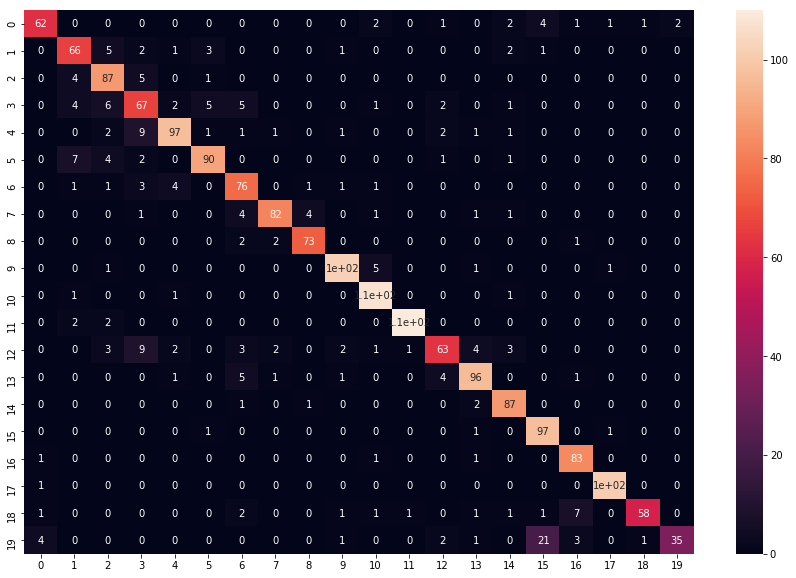

In [12]:
conf_matrix = confusion_matrix(y_test, predict)
plt.figure(figsize=(15, 10))

sn.heatmap(conf_matrix, annot=True)
plt.show()

## ADD OBSERVATIONS

- Finally, we show the most important features in our final model. First we obtain the features importance values

In [13]:
features_importance = rfc.feature_importances_

- Then we will show the top 20 most important features, sorting the importance values in descending order and then showing the corresponding name from the DF-IDF matrix:

In [14]:
indices = np.argsort(features_importance)[::-1]

for f in range(20):
    print("%d. feature %s (%f)%%" % (f + 1, itemgetter(indices[f])(feature_names), features_importance[indices[f]]*100))


1. feature sale (0.581692)%
2. feature windows (0.512047)%
3. feature bike (0.483168)%
4. feature dod (0.444170)%
5. feature car (0.411139)%
6. feature clipper (0.381649)%
7. feature hockey (0.354130)%
8. feature space (0.346888)%
9. feature mac (0.303724)%
10. feature encryption (0.290178)%
11. feature israel (0.286610)%
12. feature god (0.284873)%
13. feature graphics (0.269543)%
14. feature baseball (0.269259)%
15. feature cars (0.264665)%
16. feature rutgers (0.241997)%
17. feature israeli (0.237362)%
18. feature writes (0.236373)%
19. feature game (0.227875)%
20. feature athos (0.226239)%
